In [19]:
# Importamos las librerias necesarias
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [20]:
# Asignamos el dataset a la variable "housing"
df = fetch_california_housing(as_frame=True)
df = df.frame

In [21]:
# Vemos las primeras 5 filas para verificar que haya importado correctamente
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
# Extraemos los valores de los inputs (X) y el output (y)
X = df[["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup",'Latitude','Longitude']].values
y = df['MedHouseVal'].values

In [23]:
# Hacemos split aleatorio de los datos para obtener datos de entrenamiento (80%) y de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Estandarizamos X para obtener mayor eficiencia computacional
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [25]:
# Instanciamos la clase LinearRegression() y ajustamos el modelo a nuestro dataset
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [26]:
predicted_scores = modelo.predict(X_test)
MAE = mean_absolute_error(y_test , predicted_scores)
MSE = mean_squared_error(y_test , predicted_scores)
R2  = r2_score(y_test , predicted_scores)
print('MAE = ', MAE)
print('MSE = ', MSE)
print('R2 = ', R2)

MAE =  0.5332001304956566
MSE =  0.5558915986952445
R2 =  0.5757877060324507


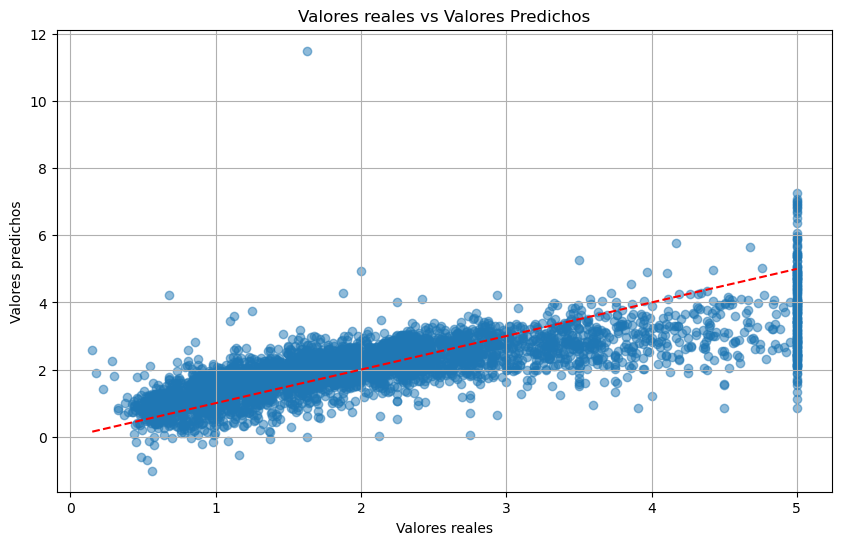

In [27]:
# Graficamos la diferencia entre los valores predichos y los reales 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_scores, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') # Línea de predicciones "perfectas"
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs Valores Predichos')
plt.grid()
plt.show()